In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats

In [2]:
import matplotlib as mpl
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(16,12,12,12)

# FQHE test

In [24]:
Ne = 20
Ns = 60
#non-thermal iterations
M0 = int(2e5)
M = int(5e6)

rs_laughlin = np.array([0.4, 0.5, 0.667, 1, 1.5, 2, 2.5, 3])

Lxs_laughlin = np.sqrt(2*np.pi*Ns/rs_laughlin)
Lys_laughlin = Lxs_laughlin*rs_laughlin

In [25]:
p_means_laughlin = np.zeros(rs_laughlin.size)
p_vars_laughlin = np.zeros(rs_laughlin.size)
p_step_const = 0.051

mod_means_laughlin = np.zeros(rs_laughlin.size)
mod_vars_laughlin = np.zeros(rs_laughlin.size)
mod_step_const = 0.051 

sign_means_laughlin = np.zeros(rs_laughlin.size)
sign_vars_laughlin = np.zeros(rs_laughlin.size)
sign_step_const = 0.051

for i in range(rs_laughlin.size):
    print(f"t = {rs_laughlin[i]}j:")
    step = p_step_const*np.sqrt(rs_laughlin[i])
    p = np.real(np.load(f"FQHE_entropy_results/p_swap_Ne_{Ne}_Ns_{Ns}_t_{rs_laughlin[i]:.2f}_step_{step:.3f}.npy"))
    print(f"p acceptance: {p[0,0]}")
    p = p[M0:]
    p_means_laughlin[i], p_vars_laughlin[i] = Stats((p[:,0] == p[:,1]))
    print(f"p = {p_means_laughlin[i]} +- {np.sqrt(p_vars_laughlin[i]/p.size)}")

    step = mod_step_const*np.sqrt(rs_laughlin[i])
    mod = np.real(np.load(f"FQHE_entropy_results/mod_swap_Ne_{Ne}_Ns_{Ns}_t_{rs_laughlin[i]:.2f}_step_{step:.3f}.npy"))
    print(f"acceptance: {mod[0]}")
    mod = mod[M0:]
    mod_means_laughlin[i], mod_vars_laughlin[i] = Stats(mod)
    print(f"mod = {mod_means_laughlin[i]} +- {np.sqrt(mod_vars_laughlin[i]/mod.size)}")

    step = sign_step_const*np.sqrt(rs_laughlin[i])
    sign = np.real(np.load(f"FQHE_entropy_results/sign_swap_Ne_{Ne}_Ns_{Ns}_t_{rs_laughlin[i]:.2f}_step_{step:.3f}.npy"))
    print(f"sign acceptance: {sign[0]}")
    sign = sign[M0:]
    sign_means_laughlin[i], sign_vars_laughlin[i] = Stats(sign)
    print(f"sign = {sign_means_laughlin[i]} +- {np.sqrt(sign_vars_laughlin[i]/sign.size)}")

t = 0.4j:
p acceptance: 0.49546919999999983
p = 0.22401245333073888 +- 0.00013456367532521332
acceptance: 0.4946622000000019
mod = 0.010048475261284584 +- 0.0001422028034992655
sign acceptance: 0.5059787999999789
sign = 0.051149731553077324 +- 0.00032210915293334654
t = 0.5j:
p acceptance: 0.4950105999999988
p = 0.23878474191984544 +- 0.00013760094360827364
acceptance: 0.49548460000000205
mod = 0.017421578149086386 +- 0.00015506184304147093
sign acceptance: 0.5060690000001217
sign = 0.0762048860141305 +- 0.0003212396143485686
t = 0.667j:
p acceptance: 0.4944516000000001
p = 0.25514098851229405 +- 0.0001406991709927542
acceptance: 0.49595939999999944
mod = 0.03333241878834696 +- 0.0001911571941024902
sign acceptance: 0.504361600000017
sign = 0.12640981566330792 +- 0.00031795160540841076
t = 1.0j:
p acceptance: 0.49451939999999905
p = 0.28413869080443943 +- 0.00014556066003287464
acceptance: 0.4966323999999998
mod = 0.07915645984681692 +- 0.00042170433966861877
sign acceptance: 0.5024095

Text(0.5, 0, '$L_{x}$')

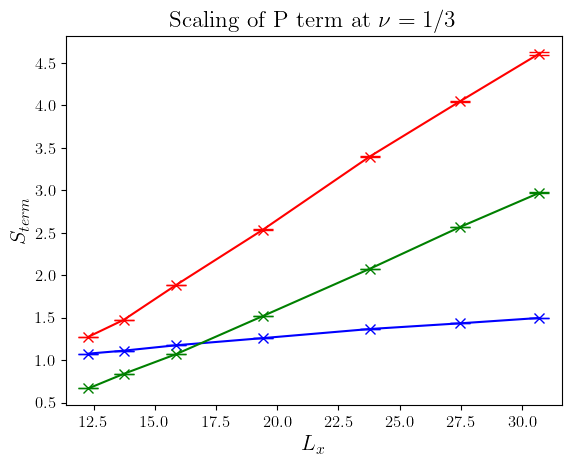

In [5]:
plt.errorbar(Lxs_laughlin, -np.log(p_means_laughlin), np.sqrt(p_vars_laughlin/p_means_laughlin**2)/np.sqrt(M-M0), marker='x',
             color='blue', markersize=7, capsize=7)
plt.errorbar(Lxs_laughlin, -np.log(mod_means_laughlin), np.sqrt(mod_vars_laughlin/mod_means_laughlin**2)/np.sqrt(M-M0), marker='x',
             color='red', markersize=7, capsize=7)
plt.errorbar(Lxs_laughlin, -np.log(sign_means_laughlin), np.sqrt(sign_vars_laughlin/sign_means_laughlin**2)/np.sqrt(M-M0), marker='x',
             color='green', markersize=7, capsize=7)
plt.title("Scaling of P term at $\\nu=1/3$")
plt.ylabel("$S_{term}$")
plt.xlabel("$L_{x}$")

In [26]:
S_MC_laughlin = np.zeros(rs_laughlin.size)
err_laughlin = np.zeros(rs_laughlin.size)

S_MC_laughlin = -np.log(p_means_laughlin*mod_means_laughlin*sign_means_laughlin)
err_laughlin = np.sqrt(p_vars_laughlin/(p_means_laughlin**2) + mod_vars_laughlin/(mod_means_laughlin**2) + sign_vars_laughlin/(sign_means_laughlin**2))/np.sqrt(M-M0)


In [27]:
popt, pcov = np.polyfit(Lxs_laughlin, S_MC_laughlin, 1, cov=True)#, w=1/err_laughlin)
print(f"scaling coeff {popt[0]} +- {np.sqrt(pcov[0,0])}")
print(f"topological term {popt[1]} +- {np.sqrt(pcov[1,1])}")
print(f"topological term th {np.log(3)}")

x_fit = np.arange(0,32,0.1)
y_fit = popt[0]*x_fit + popt[1]

scaling coeff 0.33175913505144816 +- 0.002213498344301268
topological term -1.090127651029861 +- 0.04532903568401167
topological term th 1.0986122886681098


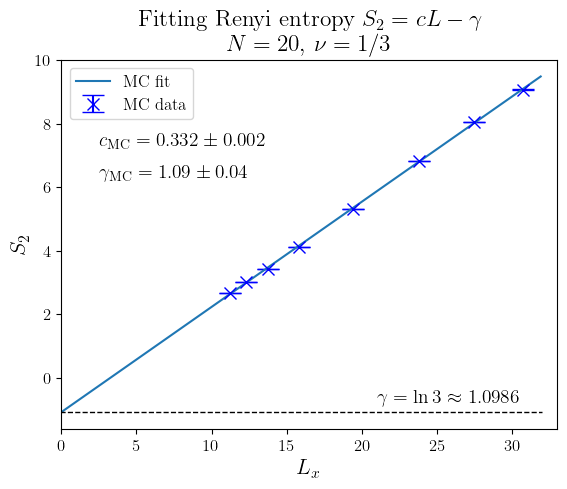

In [70]:
#plt.plot(x_th,y_th, c='black', linewidth=3)
plt.errorbar(Lxs_laughlin, S_MC_laughlin, err_laughlin, marker='x',
             color='blue', markersize=9, capsize=8, linestyle='none', markerfacecolor='none',
             label='MC data')
plt.plot(x_fit,y_fit,c='tab:blue', linewidth=1.5, label='MC fit')
plt.legend()
plt.title("Fitting Renyi entropy $S_{2} = c L - \\gamma$ \n $N=20$, $\\nu=1/3$")
plt.ylabel("$S_{2}$")
plt.xlabel("$L_{x}$")
plt.hlines(y=-np.log(3), xmin=-0.1, xmax=32, colors=['black'], linestyles=['--'], linewidth=1)
plt.text(x=21, y=-0.80, s='$\\gamma = \ln 3 \\approx 1.0986$')
plt.text(x=2.5, y=7.3, s='$c_{\\mathrm{MC}} = 0.332 \\pm 0.002$')
plt.text(x=2.5, y=6.3, s='$\\gamma_{\\mathrm{MC}} = 1.09 \\pm 0.04$')
#plt.xlim(6.5,14)
plt.xlim(0, 33)
plt.savefig('MC_benchmark_laughlin_m=3.png', dpi=350)
#plt.ylim(3.53,3.57)